# Loan Applicants Prediction - Clasification Problem

The problem is to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a **public** partial data set. [Loan Prediction Dataset - Kaggle](https://www.kaggle.com/ninzaami/loan-predication)

We are going for to predict a **GradientBoostingClassifier**, since this way I don't have to worry about the kind of data we have.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from IPython.core.display import display

import os
os.environ['PATH'].split(';')

['/home/henry/.local/share/virtualenvs/jupyter-4NCZW2FC/bin:/home/henry/.npm-global/bin:/home/henry/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin:/home/henry/Android/Sdk/tools:/home/henry/Android/Sdk/tools/bin:/home/henry/Android/Sdk/platform-tools']

## Get and clean up our loan dataset


- **X** - list of features (all of them has to be numerical)
- **Y** - False for rejected | True for approved

In [2]:
df = pd.read_csv("data/loan_train.csv")
df.shape

(614, 13)

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
# remove empty Columns
df.dropna(inplace=True)

## Convert categories to numbers

In [5]:
# For example
pd.Categorical(df['Gender'])

[Male, Male, Male, Male, Male, ..., Female, Male, Male, Male, Female]
Length: 480
Categories (2, object): [Female, Male]

In [6]:
df['Gender'] = pd.Categorical(df['Gender']).codes
df['Married'] = pd.Categorical(df['Married']).codes
df['Dependents'] = pd.Categorical(df['Dependents']).codes
df['Education'] = pd.Categorical(df['Education']).codes
df['Self_Employed'] = pd.Categorical(df['Self_Employed']).codes
df['Property_Area'] = pd.Categorical(df['Property_Area']).codes

## Get correlation fields

In [7]:
corr = df.corr()

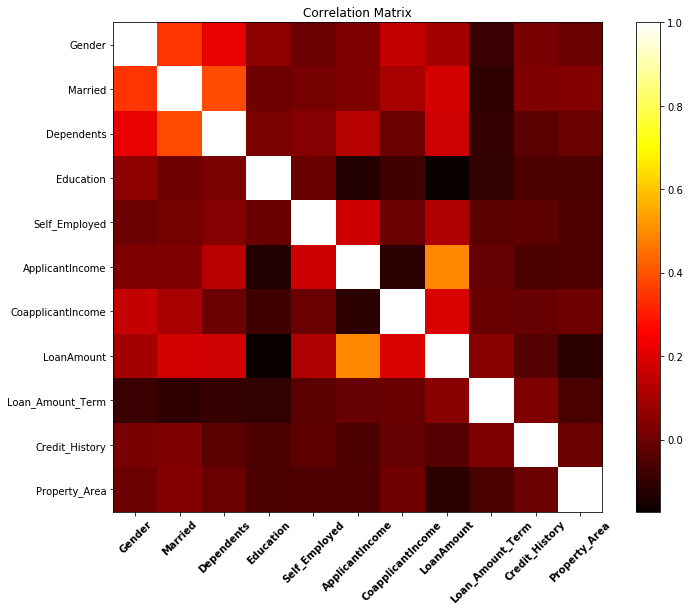

In [8]:
plt.figure(figsize=(12,9))
plt.imshow(corr,cmap='hot')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(corr)),corr.columns, fontsize=10, fontweight='bold',rotation=45)
plt.yticks(range(len(corr)),corr.columns)

plt.show()

## Train model

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import warnings

In [10]:
def train(X, y):
    fit_models = {}
    C = 1.0  # SVM regularization parameter
    models = (
        LinearSVC(C=C, max_iter=10000),
        GradientBoostingClassifier()
    )
    # title for the plots
    titles = ('LinearSVC (linear kernel)',
          'GradientBoostingClassifier'
             )

    for n, clf in enumerate(models):
        fit_models[titles[n]] = {
            'model': clf.fit(X, y),
            'accuraccy':   cross_val_score(clf, X, y, cv=5)
        }
        
    
    return fit_models



In [11]:
X = df.iloc[:,1:12]
y = df.iloc[:,12]

print(f'y: {y.name} | X: {list(X.columns)}')

y: Loan_Status | X: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


In [12]:
best_model = (0, None)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    models  = train(X, y)
    for m in models:
        accuraccy = models[m]['accuraccy'].mean()*100
        print('Loan approval accuracy for this %s is %.2f%%' % (m, accuraccy) )
        
        if accuraccy > best_model[0]:
            best_model = (accuraccy, models[m]['model'])

Loan approval accuracy for this LinearSVC (linear kernel) is 68.96%
Loan approval accuracy for this GradientBoostingClassifier is 77.50%


# Test The Best Model (GradientBoostingClassifier)

In [13]:
from pprint import pprint

dfields=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 
         'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
test_X=[[0.0, 1.0, 2.0, 1.0, 1.0, 3000.0, 0.0, 50000.0, 360.0, 1.0, 1.0]]

pprint(list(zip(dfields, test_X[0])))
predict =best_model[1].predict(test_X)

[('Gender', 0.0),
 ('Married', 1.0),
 ('Dependents', 2.0),
 ('Education', 1.0),
 ('Self_Employed', 1.0),
 ('ApplicantIncome', 3000.0),
 ('CoapplicantIncome', 0.0),
 ('LoanAmount', 50000.0),
 ('Loan_Amount_Term', 360.0),
 ('Credit_History', 1.0),
 ('Property_Area', 1.0)]


In [14]:
print('Would this person get the loan?:', predict[0])

df_result = pd.DataFrame(best_model[1].predict_proba(test_X), columns=best_model[1].classes_)

print('Probablity of loan being approved: %d%%, rejected: %d%%' % 
      (df_result.Y.iloc[0]*100, df_result.N.iloc[0]*100)
     )

Would this person get the loan?: Y
Probablity of loan being approved: 76%, rejected: 23%
